In [1]:
from BacktestingEngine import Intraday_Simulator, StrategyPerformance
from statsmodels.stats.stattools import jarque_bera

import pandas_ta as ta
import datetime

In [2]:
class Algos:
    def __init__(self, num):
        self.num = num
        self.__setup_func = getattr(self, f'setup{num}')
        self.__algo_func = getattr(self, f'algo{num}')

    def setup1(self, df):
        df["small_rolling"] = ta.sma(df["close"], 20)
        df["long_rolling"] = ta.sma(df["close"], 200)
        return df
    
    def algo1(self, **var):
        """
        Golden Crossover
        """
        df = var["df"]
        row = df.iloc[-1]

        if row.hasnans:
            return 0

        rol_small, rol_long = row["small_rolling"], row["long_rolling"]
        
        # Buy
        if not var["bought"] and rol_small > rol_long:
            return 1
        
        # Sell
        if var["bought"] and rol_small < rol_long:
            return -1
        
        return 0
    
    def send_setup(self, df):
        """
        Add columns/indicators to calculate before the run in order to save time

        Inputs
        :df (pd.DataFrame) The DataFrame containing OHLC (Open, High, Low, Close), Adj Close and Volume

        Output
        :df (pd.DataFrame) Same DataFrame with more columns and/or indicators
        """
        return self.__setup_func(df)
        # return self.setup11(df)

    def send_algo(self, **var):
        """
        Get values from the environment

        Inputs (var)
        :df (pd.DataFrame)            The DataFrame containing all values upto current granularity (i.e. 1m, 5m, 1d)
        :balance (float)              Cash spendable
        :shares (integer)             Position
        :initial_day_balance (float)  Money in the account at the beginning of the day
        :last_market_exposure (float) Money used to buy Shares at the last buy point
        :market_exposure (float)      Shares * Price
        :new_stock (bool)             True if it is the start of a file
        :bought (bool)                True if any shares have been bought

        Output
        :(float) a value between 0 and 1 indicating how many shares to buy from total account balance
        """
        return self.__algo_func(**var)
        # return self.algo11(df)

<h3>
<font color='blue'> 5 days </font> is a weeks worth of trading <br>
<font color='blue'> 21 days </font> is a months worth of trading <br>
<font color='blue'> 251 days </font> is a years worth of trading <br>
</h3>

In [3]:
Sim = Intraday_Simulator("Data/intra_all_new_test")
Sim.filter_files(cycle=True)

Sim.setup(account_balance=5000, trade_method="fixed", trade_cost=2, limit=-1, algorithm=Algos("1"))
Sim.run(warnings=False, verbose=False, progress=True, capture_trades=True, slippage=0)

88 / 88 Data/intra_all_new_test/RCKT_2022-09-30.csvv


{'Final': 5780.6,
 'Net': 780.6,
 'Total Trades': 111,
 'Winning trades': 37.83783783783784}

Outliers found
(5185.8, 690.44, 'Data/intra_all_new_test/KNTE_2022-10-12.csv') at index 49
(5688.29, 364.89, 'Data/intra_all_new_test/PRTA_2022-09-28.csv') at index 85
Before removing outliers


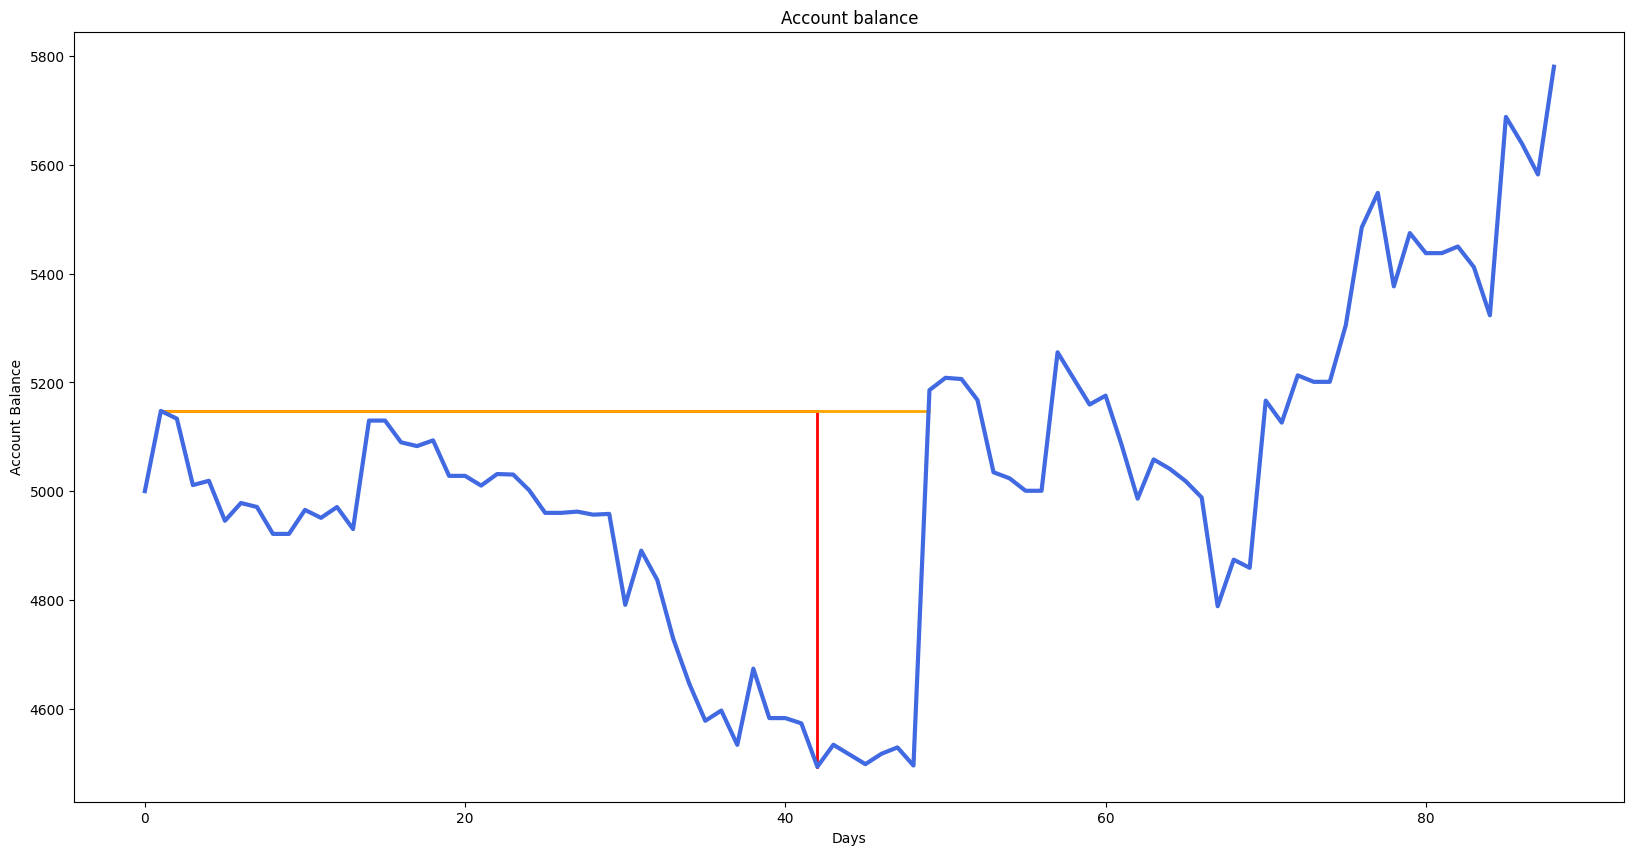

After removing outliers


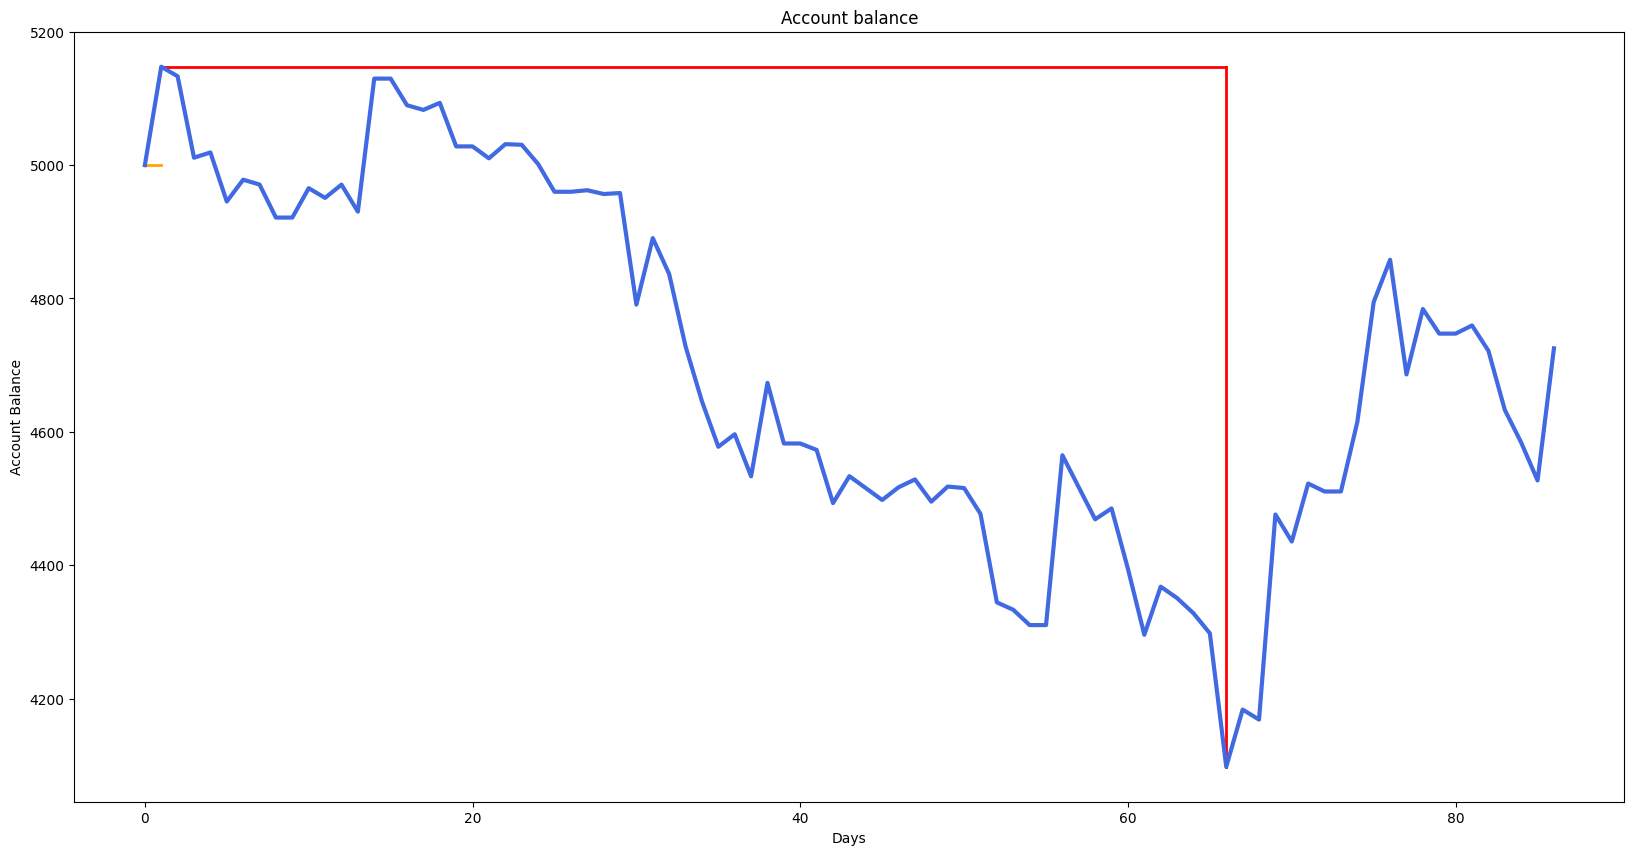

{'mean': -3.16, '%mean': -0.0008170322967604158, 'median': -9.67, '%median': -0.0021146411014502896, 'std dev': 83.98757601642997, '%std dev': 0.018178627575213803, 'variance': 7053.912925115602, 'range': 507.57, 'min range': -200.02, 'max range': 307.55, 'skewness': 1.0684628109063754, 'kurtosis': 2.7118793108093624, 'sharpe ratio': -0.37768624674377693, 'max drawdown': 20.393466444426323, 'max drawdown length': [(0, 1)], 'Ending balance': 4725.2699999999995}
{'mean': 8.77, '%mean': 0.0013625484127869805, 'median': -7.3, '%median': -0.001468555806126493, 'std dev': 116.96362639462488, '%std dev': 0.022558662276428033, 'variance': 13680.489899381391, 'range': 890.46, 'min range': -200.02, 'max range': 690.44, 'skewness': 2.813763705701029, 'kurtosis': 13.018496810394272, 'sharpe ratio': 0.507564966475861, 'max drawdown': 12.713741214318187, 'max drawdown length': [(1, 49)], 'Ending balance': 5780.603122711179}


In [4]:
Algotesting = StrategyPerformance(save_plots=False, folder_name="ALGO11_RM_2")
Algotesting.find_outliers(Sim)

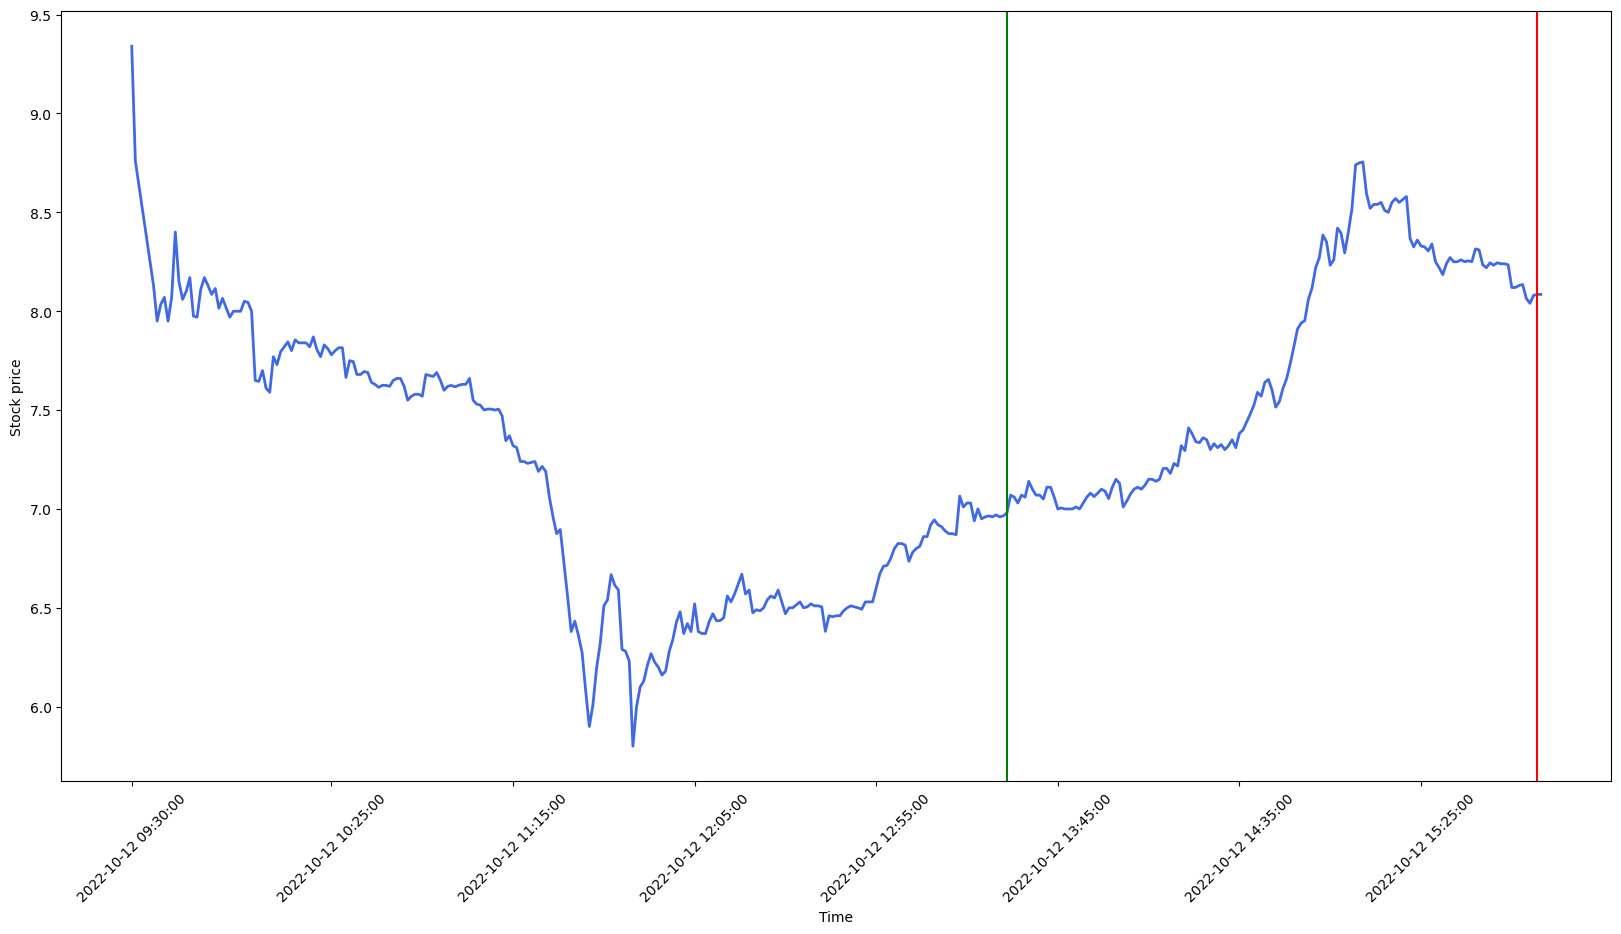

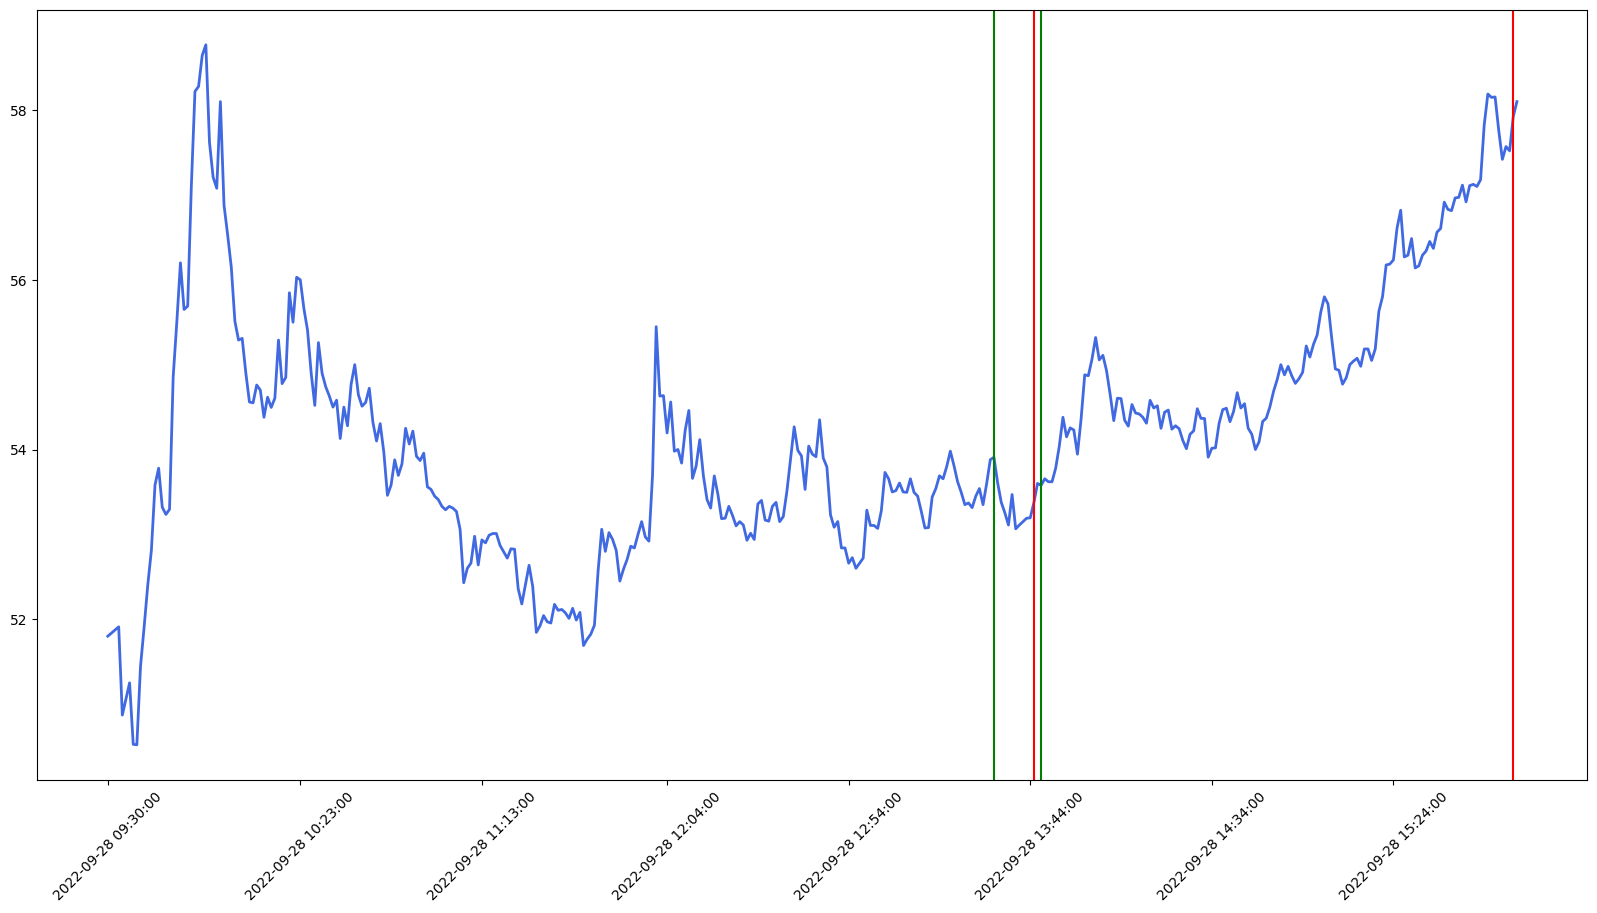

In [5]:
Algotesting.check_outliers(Sim, customs=[])

In [6]:
# Algotesting.remove_outliers(Sim)

In [7]:
print(f"Returns normality: {jarque_bera(Sim.get_history([1]))[1][0] < 0.05}")

Returns normality: True


23


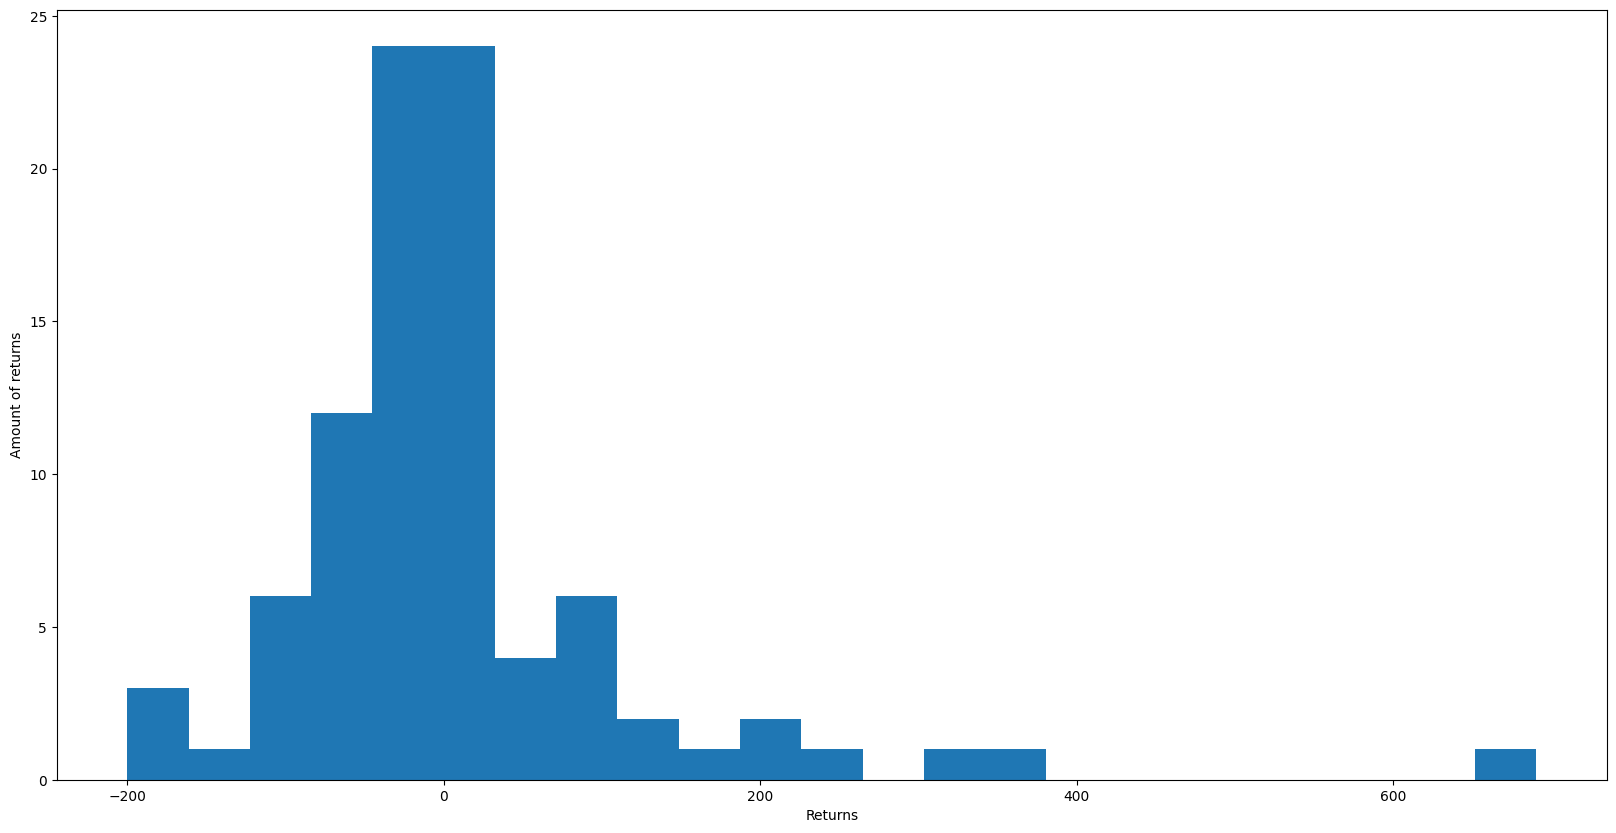

In [8]:
# 'range' or 'total length'
Algotesting.returns_histogram(Sim, bins_algo="total length", bins_num=None)

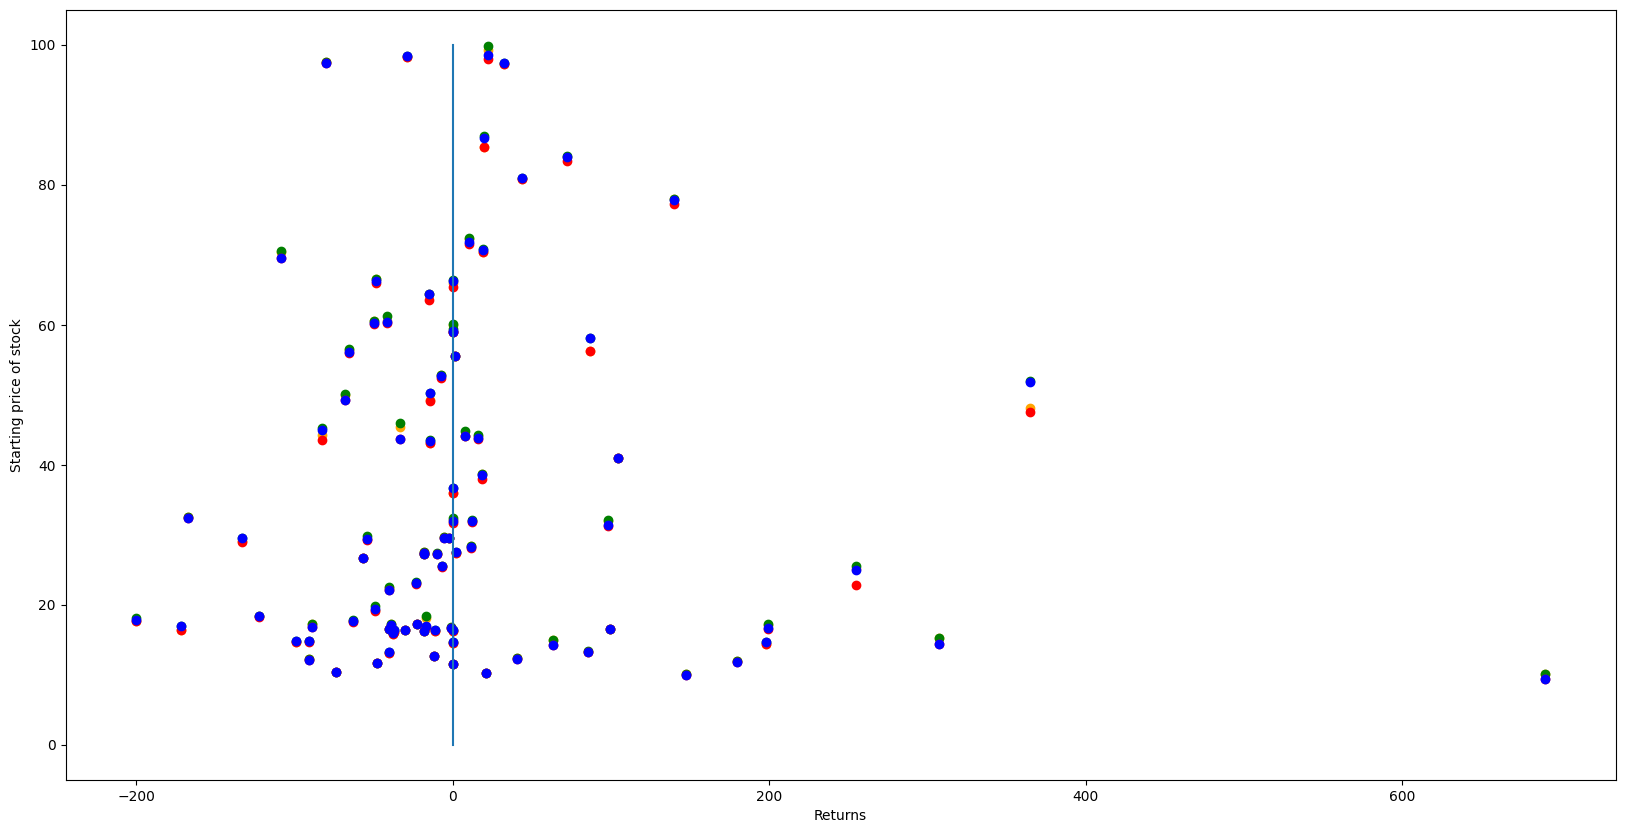

In [9]:
Algotesting.price_to_returns(Sim)

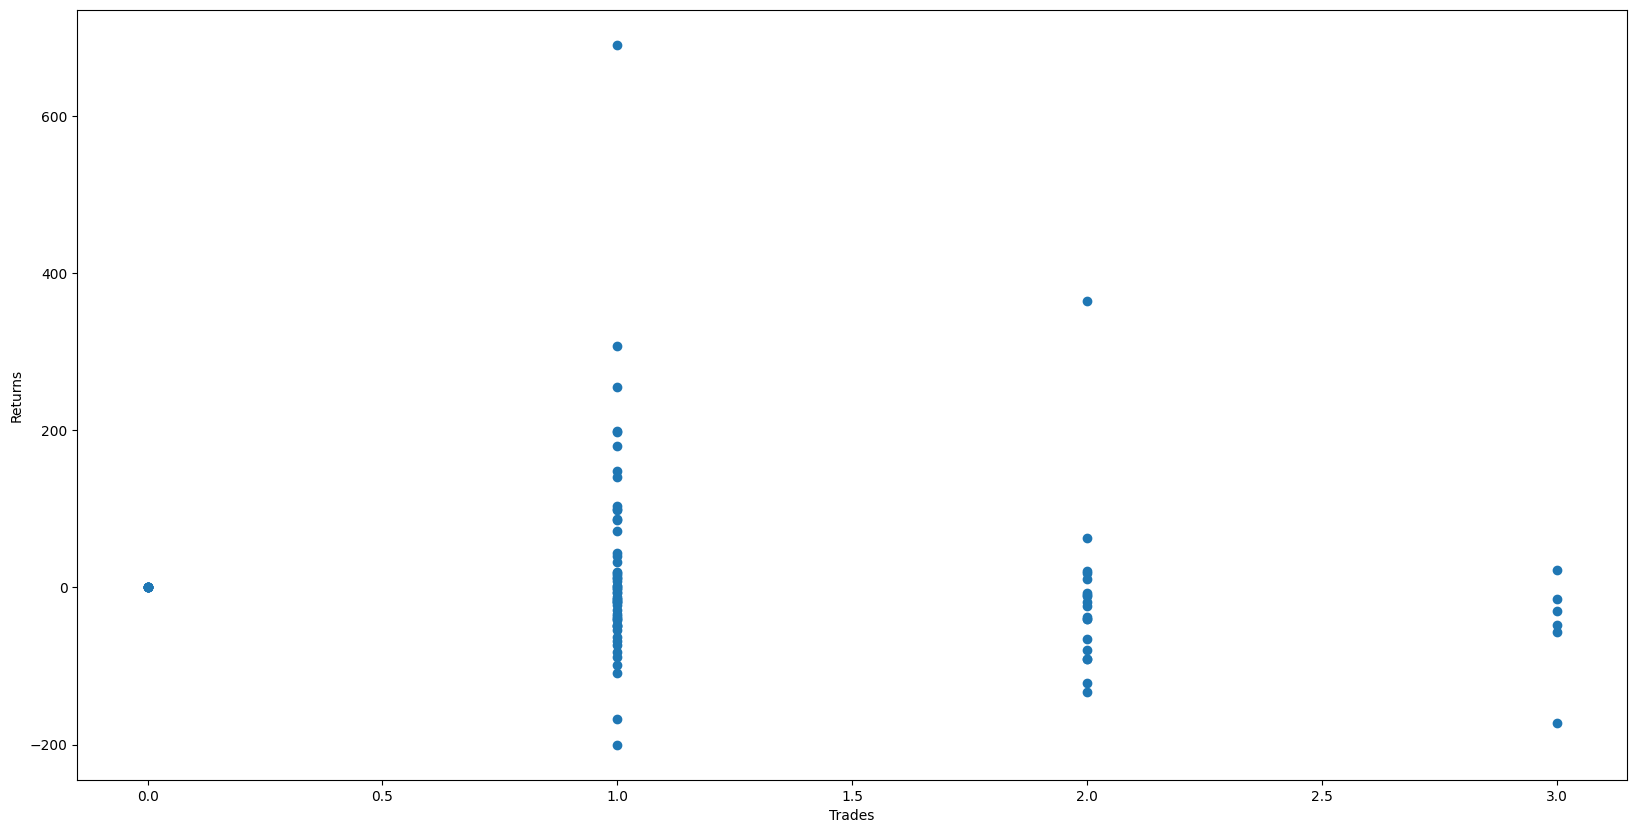

In [10]:
# If you remve outliers this will not work
Algotesting.returns_to_trades(Sim, returns_line=None)

# Run all Algorithms (Takes sometime)

In [ ]:
input("Press Enter to continue")
Sim = Intraday_Simulator("Data/intra_all_new_test")
Sim.filter_files(cycle=True)

results = []

for i in range(1, int((len(dir(Algos)) - 28) / 2) + 1):
    print(f"Running Algo {i}")
    Sim.setup(account_balance=5000, trade_method="fixed", trade_cost=2, limit=-1, Sim=Algos(str(i)))
    results.append((Sim.run(warnings=False, verbose=False, progress=False, capture_trades=False, slippage=0), str(i)))

In [ ]:
sorted(results, key=lambda x: x[0]["Net"], reverse=True)